In [29]:
import numpy as np
import pandas as pd

In [30]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [31]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [32]:
match.shape

(756, 18)

In [33]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [34]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [35]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [36]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
609,303,1,175.0
611,304,1,175.0
613,305,1,147.0
615,306,1,185.0


In [37]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [38]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,303,IPL-2011,Kolkata,22-05-2011,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,JEC Franklin,Eden Gardens,SK Tarapore,SJA Taufel,NaN,303,175.0
303,304,IPL-2011,Mumbai,24-05-2011,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SK Raina,Wankhede Stadium,Asad Rauf,SJA Taufel,NaN,304,175.0
304,305,IPL-2011,Mumbai,25-05-2011,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,MM Patel,Wankhede Stadium,Asad Rauf,SJA Taufel,NaN,305,147.0
305,306,IPL-2011,Chennai,27-05-2011,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,43,0,CH Gayle,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,306,185.0


In [39]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [40]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [41]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [42]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [43]:
match_df.shape

(252, 20)

In [44]:
match_df = match_df[match_df['dl_applied'] == 0]

In [45]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [46]:
delivery_df = match_df.merge(delivery,on='match_id')

In [47]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [48]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58137,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,2,AN Ahmed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
58138,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,3,AN Ahmed,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
58139,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,4,AN Ahmed,...,0.0,0.0,0.0,0.0,6.0,0.0,6.0,NaN,NaN,NaN
58140,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,5,AN Ahmed,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN


In [49]:
# Handle missing or infinite values before conversion
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].fillna(0).replace([np.inf, -np.inf], 0).astype(int) # Replace NaN and inf with 0, then convert to integer
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum() # Calculate the cumulative sum

In [50]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [51]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [52]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0.0,1,NaN,NaN,NaN,1,206.0,119
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,NaN,1,206.0,118
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,NaN,1,206.0,117
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0.0,2,NaN,NaN,NaN,3,204.0,116
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0.0,4,NaN,NaN,NaN,7,200.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58137,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,2,AN Ahmed,...,0.0,0.0,0.0,0,NaN,NaN,NaN,130,55.0,4
58138,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,3,AN Ahmed,...,0.0,4.0,0.0,4,NaN,NaN,NaN,134,51.0,3
58139,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,4,AN Ahmed,...,0.0,6.0,0.0,6,NaN,NaN,NaN,140,45.0,2
58140,306,Chennai,Royal Challengers Bangalore,185.0,2,Mumbai Indians,Royal Challengers Bangalore,20,5,AN Ahmed,...,0.0,2.0,0.0,2,NaN,NaN,NaN,142,43.0,1


In [53]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int') # Ensure the column is of integer type
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum() # Calculate the cumulative sum of integers
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1,0,NaN,NaN,1,206.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0,0,NaN,NaN,1,206.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0,0,NaN,NaN,1,206.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2,0,NaN,NaN,3,204.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4,0,NaN,NaN,7,200.0,115,10


In [54]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1,0,NaN,NaN,1,206.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0,0,NaN,NaN,1,206.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0,0,NaN,NaN,1,206.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2,0,NaN,NaN,3,204.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4,0,NaN,NaN,7,200.0,115,10


In [55]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [56]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [57]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [58]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [59]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [60]:
final_df = final_df.sample(final_df.shape[0])

In [61]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
22304,Mumbai Indians,Deccan Chargers,Durban,92.0,65,9,168.0,8.290909,8.492308,0


In [62]:
final_df.dropna(inplace=True)

In [63]:
final_df = final_df[final_df['balls_left'] != 0]

In [64]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [65]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
42538,Rajasthan Royals,Kings XI Punjab,Jaipur,33.0,50,9,153.0,10.285714,3.960000
51120,Rajasthan Royals,Kings XI Punjab,Chandigarh,64.0,10,4,195.0,7.145455,38.400000
32837,Deccan Chargers,Delhi Daredevils,Centurion,0.0,15,6,153.0,8.742857,0.000000
381,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,147.0,111,10,157.0,6.666667,7.945946
42302,Mumbai Indians,Chennai Super Kings,Chennai,75.0,33,3,165.0,6.206897,13.636364
...,...,...,...,...,...,...,...,...,...
47745,Mumbai Indians,Chennai Super Kings,Mumbai,128.0,73,9,168.0,5.106383,10.520548
50608,Kolkata Knight Riders,Rajasthan Royals,Kolkata,40.0,63,8,81.0,4.315789,3.809524
49405,Kings XI Punjab,Chennai Super Kings,Chandigarh,117.0,80,9,188.0,10.650000,8.775000
41786,Royal Challengers Bangalore,Delhi Daredevils,Delhi,106.0,46,7,184.0,6.324324,13.826087


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [68]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [69]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [70]:
y_pred = pipe.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8435934144595562

In [72]:
pipe.predict_proba(X_test)[10]

array([0.05588145, 0.94411855])

In [73]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [74]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [75]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,0,74.3,25.7
10467,2,8.0,0,66.0,34.0
10473,3,1.0,0,74.9,25.1
10479,4,7.0,1,83.5,16.5
10485,5,12.0,0,72.9,27.1
10491,6,13.0,0,57.9,42.1
10497,7,9.0,0,50.2,49.8
10505,8,15.0,0,31.1,68.9
10511,9,7.0,0,28.4,71.6
10518,10,17.0,0,13.3,86.7


Text(0.5, 1.0, 'Target-178.0')

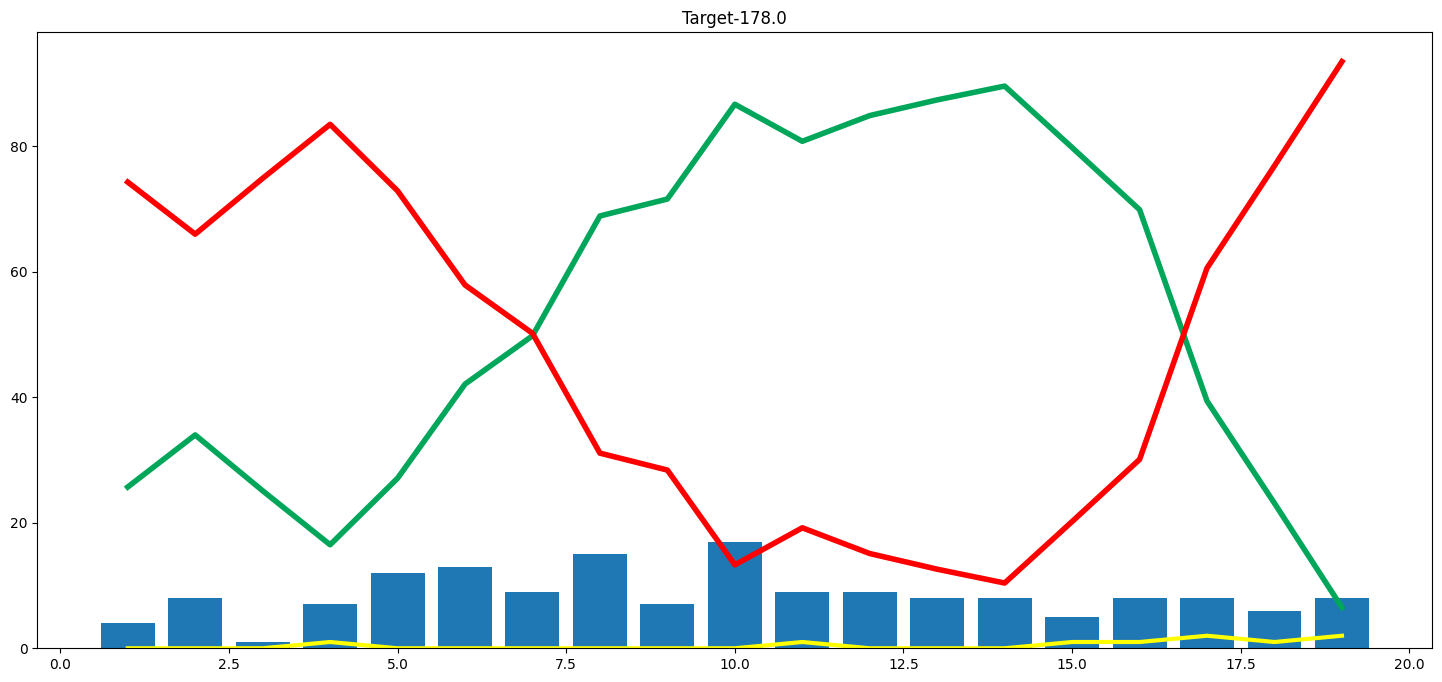

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [77]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [78]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala'],
      dtype=object)

In [79]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [85]:
# prompt: teams win prediction

pipe = pickle.load(open('pipe.pkl','rb'))
teams

# Assuming user input for teams and city
batting_team = 'Royal Challengers Bangalore'
bowling_team = 'Chennai Super Kings'
city = 'Mumbai'

# Example input for other features
runs_left = 100
balls_left = 10
wickets = 7
total_runs_x = 180
crr = 7
rrr = 20

# Create input array
input_df = pd.DataFrame({
    'batting_team': [batting_team],
    'bowling_team': [bowling_team],
    'city': [city],
    'runs_left': [runs_left],
    'balls_left': [balls_left],
    'wickets': [wickets],
    'total_runs_x': [total_runs_x],
    'crr': [crr],
    'rrr': [rrr]
})

# Make prediction
result = pipe.predict_proba(input_df)

# Print result
loss_probability = round(result[0][0]*100, 1)
win_probability = round(result[0][1]*100, 1)

print(f"{batting_team} has a {win_probability}% chance of winning against {bowling_team} in {city}.")
print(f"They also have a {loss_probability}% chance of losing.")


Royal Challengers Bangalore has a 1.7% chance of winning against Chennai Super Kings in Mumbai.
They also have a 98.3% chance of losing.
